### Class Assignment 5

#### Saloni Mishra, Date: October 7, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataset uploading
#### There is no null values.

In [48]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [52]:
print(dataset.shape)
dataset.describe()

(400, 5)


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [51]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [3]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

## LOGISTIC REGRESSION

#### After splitting dataset into train and test, we standardize the independent variables.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
classifier_LR=LogisticRegression(random_state=0)
classifier_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred_LR=classifier_LR.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm_LR=confusion_matrix(y_test, y_pred_LR)
cm_LR

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [67]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_LR).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("Logistic Regression specificity, Precision, Recall(Sensitivity) are", specificity, Precision, Recall, accuracy)

Logistic Regression specificity, Precision, Recall(Sensitivity) are 0.9558823529411765 0.8888888888888888 0.75 0.89


In [59]:
accuracy=(65+24)/(65+3+8+24)
print("Accuracy is",accuracy)

Accuracy is 0.89


## KNN CLASSIFICATION

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
classifier_knn=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_pred_knn=classifier_knn.predict(X_test)


In [25]:
cm_knn=confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("KNN specificity, Precision, Recall(Sensitivity), accuracy are", specificity, Precision, Recall, accuracy)

KNN specificity, Precision, Recall(Sensitivity), accuracy are 0.9411764705882353 0.8787878787878788 0.90625 0.89


In [27]:
accuracy=(64+29)/(64+29+7)
accuracy

0.93

## Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier_NB=GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB=classifier_NB.predict(X_test)

In [30]:
cm_NB=confusion_matrix(y_test, y_pred_NB)
cm_NB

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [32]:
accuracy=(65+25)/(65+25+10)
accuracy

0.9

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_NB).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("Naive Bayes accuracy, specificity, Precision, Recall(Sensitivity) are", specificity, Precision, Recall, accuracy)

Naive Bayes accuracy, specificity, Precision, Recall(Sensitivity) are 0.9558823529411765 0.8928571428571429 0.78125 0.89


## Plot of KNN Classifier

### ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

### ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

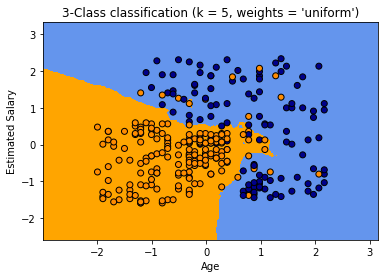

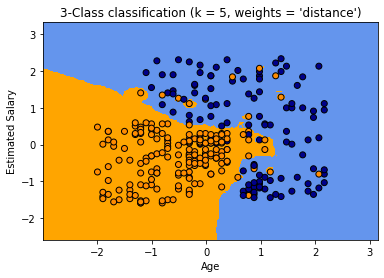

In [63]:
# Reference: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

n_neighbors = 5




h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Plot of Naive Bayes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


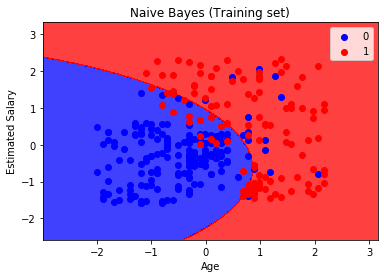

In [47]:
# Visualising the Training set results
#reference:https://medium.com/pursuitnotes/day-14-naive-bayes-classifier-2-fe5b176b2826
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_NB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

### Conclusion

#### Different classification methods are used in this assignment such as Logistic Regression, KNN and Naive Bayes. Comparing plot of KNN and Naive Bayes is also given. Logistic Regression specificity, Precision, Recall(Sensitivity), Accuracy are 0.956,  0.88 ,0.75  and 0.89 respectively. KNN specificity, Precision, Recall(Sensitivity), accuracy are 0.94, 0.88, 0.906 and 0.89 respectively. Naive Bayes accuracy, specificity, Precision, Recall(Sensitivity) are 0.956,  0.89, 0.78 and  0.89 respectively. All measures of different models are almost same only Naive Bayes sensitivity is less than others. 